# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Agustina Setianing Budi
- **Email:** setianinga@gmail.com
- **ID Dicoding:** agustinasb

## Menentukan Pertanyaan Bisnis

- Bagaimana pola permintaan penyewaan sepeda pada hari kerja dibandingkan akhir pekan, berdasarkan waktu dan musim?
-  Bagaimana pengaruh faktor cuaca (suhu, kelembapan, dan kondisi cuaca) terhadap jumlah sepeda yang disewa?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## Data Wrangling

###Mengumpulkan Data


In [ ]:
bike_day = pd.read_csv('drive/MyDrive/Colab Notebooks/Bike-sharing-dataset/day.csv')
bike_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
bike_hr = pd.read_csv('drive/MyDrive/Colab Notebooks/Bike-sharing-dataset/hour.csv')
bike_hr.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Menampilkan Informasi dasar bike_day

In [ ]:
bike_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
bike_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
print("Jumlah baris dan kolom:", bike_day.shape)

Jumlah baris dan kolom: (731, 16)


In [ ]:
print("Nama kolom:", bike_day.columns.tolist())

Nama kolom: ['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


### Cek Missing Value dari bike_ day

In [ ]:
bike_day.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
print("Nilai yang hilang di bike_hr:\n", bike_day.isna().sum()[bike_day.isna().sum() > 0])

Nilai yang hilang di bike_hr:
 Series([], dtype: int64)


### Mengubah kolom 'date' menjadi datetime bike_day

In [ ]:
bike_day['date'] = pd.to_datetime(bike_day['dteday'])

### Menambahkan kolom bulan, hari, dan tahun

In [ ]:
bike_day['month'] = bike_day['date'].dt.month
bike_day['day'] = bike_day['date'].dt.day
bike_day['year'] = bike_day['date'].dt.year
bike_day['day_of_week'] = bike_day['date'].dt.day_name()


### Menambahkan kolom untuk weekend

In [ ]:
bike_day['is_weekend'] = bike_day['day_of_week'].isin(['Saturday', 'Sunday']).astype(int)

In [ ]:
bike_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,windspeed,casual,registered,cnt,date,month,day,year,day_of_week,is_weekend
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,0.160446,331,654,985,2011-01-01,1,1,2011,Saturday,1
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,...,0.248539,131,670,801,2011-01-02,1,2,2011,Sunday,1
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,...,0.248309,120,1229,1349,2011-01-03,1,3,2011,Monday,0
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,...,0.160296,108,1454,1562,2011-01-04,1,4,2011,Tuesday,0
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,...,0.186900,82,1518,1600,2011-01-05,1,5,2011,Wednesday,0


### Memeriksa duplikasi

In [ ]:
bike_day.duplicated().sum()

0

In [ ]:
print("Jumlah duplikasi di bike_day:", bike_day.duplicated().sum())

Jumlah duplikasi di bike_day: 0


Insight

*   Informasi Dataset: Dengan menggunakan info() dan head(), kita dapat memahami struktur dataset, termasuk tipe data dari setiap kolom dan melihat beberapa contoh data. Ini membantu kita untuk mengetahui bagaimana data disusun dan apakah ada kolom yang perlu diubah.
*   Pemeriksaan Nilai yang Hilang: Menggunakan isna().sum(), kita dapat mengidentifikasi kolom mana yang memiliki nilai yang hilang.
*   Pengolahan Tanggal: Mengonversi kolom year, mnth, dan hr menjadi kolom date memungkinkan kita untuk melakukan analisis berbasis waktu. Ini penting untuk memahami pola penggunaan sepeda berdasarkan waktu, seperti jam sibuk atau hari tertentu.
*   Menambahkan Kolom Baru: Dengan menambahkan kolom month, day, year, dan day_of_week, kita dapat menganalisis data dengan lebih mendalam, seperti memeriksa pola berdasarkan bulan atau hari dalam seminggu.
*  Identifikasi Akhir Pekan: Menambahkan kolom is_weekend memungkinkan kita untuk dengan mudah memisahkan data antara akhir pekan dan hari kerja, yang dapat membantu dalam analisis perilaku pengguna sepeda.
*  Pemeriksaan Duplikasi: Memeriksa dan menghapus duplikasi memastikan bahwa setiap entri dalam dataset adalah unik, yang penting untuk analisis yang akurat.





### Menampilkan informasi dasar bike_hr

In [ ]:
bike_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
bike_hr.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
print("Jumlah baris dan kolom:", bike_hr.shape)

Jumlah baris dan kolom: (17379, 17)


In [ ]:
print("Nama kolom:", bike_hr.columns.tolist())

Nama kolom: ['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


### Cek Missing Value

In [ ]:
bike_hr.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [ ]:
print("Nilai yang hilang di bike_hr:\n", bike_hr.isna().sum()[bike_hr.isna().sum() > 0])

Nilai yang hilang di bike_hr:
 Series([], dtype: int64)


### Mengubah Mengubah kolom 'date' menjadi datetime

In [ ]:
 bike_hr['date'] = pd.to_datetime(bike_hr['dteday'])

### Menambahkan kolom bulan, hari, dan tahun

In [ ]:
bike_hr['month'] = bike_hr['date'].dt.month
bike_hr['day'] = bike_hr['date'].dt.day
bike_hr['year'] = bike_hr['date'].dt.year
bike_hr['day_of_week'] = bike_hr['date'].dt.day_name()

### Menambahkan kolom untuk weekend

In [ ]:
bike_hr['is_weekend'] = bike_hr['day_of_week'].isin(['Saturday', 'Sunday']).astype(int)

In [ ]:
bike_hr.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,windspeed,casual,registered,cnt,date,month,day,year,day_of_week,is_weekend
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,0.0,3,13,16,2011-01-01,1,1,2011,Saturday,1
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,0.0,8,32,40,2011-01-01,1,1,2011,Saturday,1
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,0.0,5,27,32,2011-01-01,1,1,2011,Saturday,1
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,0.0,3,10,13,2011-01-01,1,1,2011,Saturday,1
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,0.0,0,1,1,2011-01-01,1,1,2011,Saturday,1


In [ ]:
bike_hr.duplicated().sum()
print("Jumlah duplikasi di bike_hr:", bike_hr.duplicated().sum())

Jumlah duplikasi di bike_hr: 0


Insight

*   Informasi Dataset: Dengan menggunakan info() dan head(), kita dapat memahami struktur dataset, termasuk tipe data dari setiap kolom dan melihat beberapa contoh data. Ini membantu kita untuk mengetahui bagaimana data disusun dan apakah ada kolom yang perlu diubah.
*   Pemeriksaan Nilai yang Hilang: Menggunakan isna().sum(), kita dapat mengidentifikasi kolom mana yang memiliki nilai yang hilang.
*   Pengolahan Tanggal: Mengonversi kolom year, mnth, dan hr menjadi kolom date memungkinkan kita untuk melakukan analisis berbasis waktu. Ini penting untuk memahami pola penggunaan sepeda berdasarkan waktu, seperti jam sibuk atau hari tertentu.
*   Menambahkan Kolom Baru: Dengan menambahkan kolom month, day, year, dan day_of_week, kita dapat menganalisis data dengan lebih mendalam, seperti memeriksa pola berdasarkan bulan atau hari dalam seminggu.
*  Identifikasi Akhir Pekan: Menambahkan kolom is_weekend memungkinkan kita untuk dengan mudah memisahkan data antara akhir pekan dan hari kerja, yang dapat membantu dalam analisis perilaku pengguna sepeda.
*  Pemeriksaan Duplikasi: Memeriksa dan menghapus duplikasi memastikan bahwa setiap entri dalam dataset adalah unik, yang penting untuk analisis yang akurat.





In [ ]:
# Menyimpan DataFrame bike_day ke file CSV di direktori Colab
bike_day.to_csv('/content/bike_day_modified.csv', index=False)

print("Dataset berhasil disimpan sebagai 'bike_day_modified.csv'")


Dataset berhasil disimpan sebagai 'bike_day_modified.csv'


In [ ]:
# Menyimpan DataFrame bike_hr ke file CSV di direktori Colab
bike_hr.to_csv('/content/bike_hr_modified.csv', index=False)

print("Dataset 'bike_hr' berhasil disimpan sebagai 'bike_hr_modified.csv'")


Dataset 'bike_hr' berhasil disimpan sebagai 'bike_hr_modified.csv'


## Exploratory Data Analysis (EDA)

### Memerikasa Tipe Data

In [ ]:
bike_day.dtypes
bike_hr.dtypes

,0
instant,int64
dteday,object
season,int64
yr,int64
mnth,int64
hr,int64
holiday,int64
weekday,int64
workingday,int64
weathersit,int64


### Memeriksa Statistik Deskriptif

#### Untuk tabel bike_day

In [ ]:
# Descriptive statistics
print(bike_day.describe())

# Ensure 'dteday' is datetime
bike_day['dteday'] = pd.to_datetime(bike_day['dteday'])

# Pisahkan hari kerja dan akhir pekan
bike_day['weekday'] = bike_day['dteday'].dt.day_name()
bike_day['is_weekend'] = bike_day['weekday'].isin(['Saturday', 'Sunday'])

# Hitung total penyewaan untuk hari kerja dan akhir pekan
weekend_rentals = bike_day[bike_day['is_weekend']]['cnt'].sum()
weekday_rentals = bike_day[~bike_day['is_weekend']]['cnt'].sum()

print(f'Total penyewaan akhir pekan: {weekend_rentals}')
print(f'Total penyewaan hari kerja: {weekday_rentals}')

          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
min      0.000000    1.0000

#### Untuk tabel bike_hr

In [ ]:
# Descriptive statistics
print(bike_hr.describe())

# Ensure 'dteday' is datetime
bike_hr['dteday'] = pd.to_datetime(bike_hr['dteday'])

# Pisahkan hari kerja dan akhir pekan
bike_hr['weekday'] = bike_hr['dteday'].dt.day_name()
bike_hr['is_weekend'] = bike_hr['weekday'].isin(['Saturday', 'Sunday'])

# Hitung total penyewaan untuk hari kerja dan akhir pekan
weekend_rentals_hr = bike_hr[bike_hr['is_weekend']]['cnt'].sum()
weekday_rentals_hr = bike_hr[~bike_hr['is_weekend']]['cnt'].sum()

print(f'Total penyewaan akhir pekan (bike_hr): {weekend_rentals_hr}')
print(f'Total penyewaan hari kerja (bike_hr): {weekday_rentals_hr}')

          instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
min        0.000000      0.000000      0.000000      1.000000      0.

### Segmentasi Data Berdasarkan Musim

#### pada tabel bike_day

In [ ]:
# Tambahkan kolom musim
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

bike_day['season'] = bike_day['dteday'].dt.month.apply(get_season)

# Hitung total penyewaan berdasarkan musim
seasonal_rentals = bike_day.groupby('season')['cnt'].sum()
print(seasonal_rentals)

season
Fall       923174
Spring     829700
Summer    1042484
Winter     497321
Name: cnt, dtype: int64


### Analisis Pola Waktu

<Figure size 1200x600 with 0 Axes>

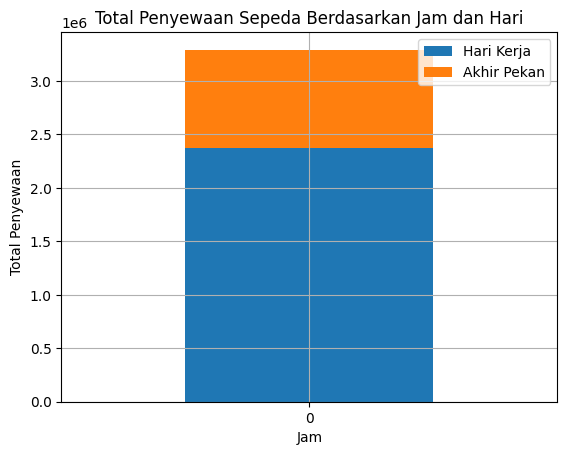

In [ ]:
# Tambahkan kolom jam
bike_day['hour'] = bike_day['date'].dt.hour

# Hitung total penyewaan berdasarkan jam dan hari
hourly_rentals = bike_day.groupby(['hour', 'is_weekend'])['cnt'].sum().unstack()

# Visualisasi
plt.figure(figsize=(12, 6))
hourly_rentals.plot(kind='bar', stacked=True)
plt.title('Total Penyewaan Sepeda Berdasarkan Jam dan Hari')
plt.xlabel('Jam')
plt.ylabel('Total Penyewaan')
plt.xticks(rotation=0)
plt.legend(['Hari Kerja', 'Akhir Pekan'])
plt.grid()
plt.show()

<Figure size 1200x600 with 0 Axes>

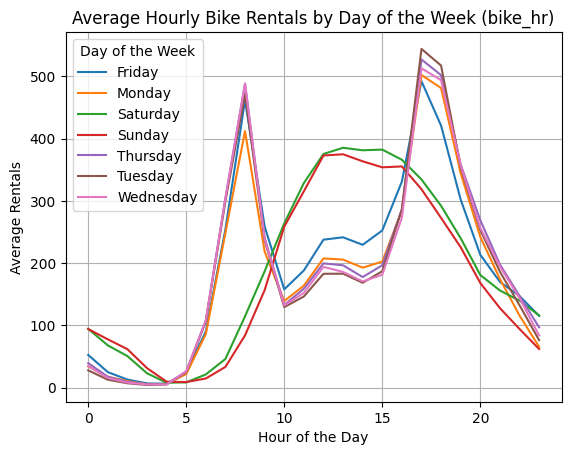

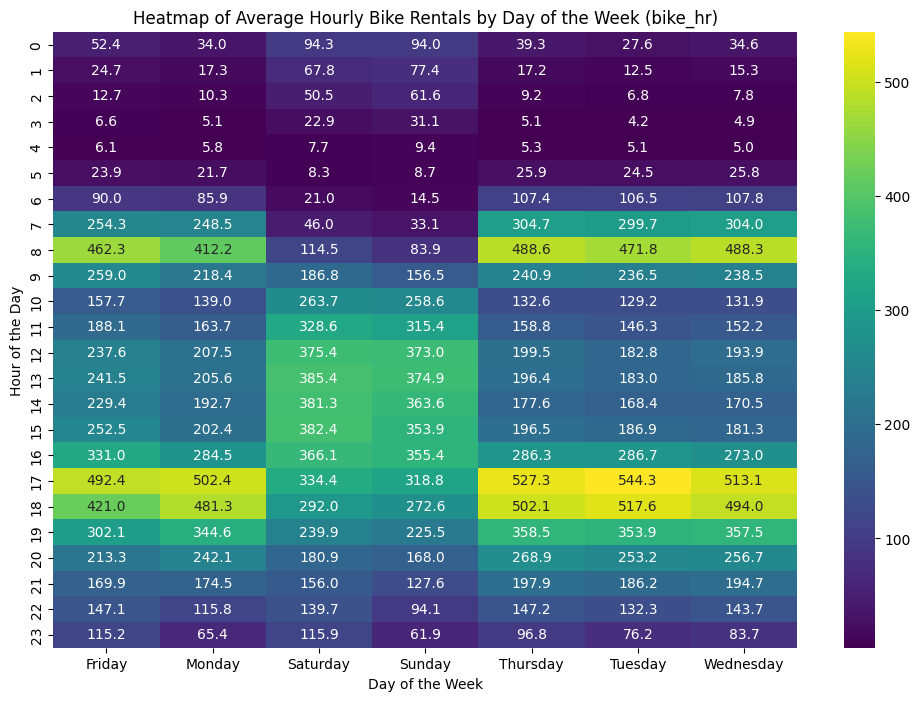

In [ ]:
# Group by hour and day of the week, then calculate average rentals
hourly_daily_rentals = bike_hr.groupby(['hr', 'day_of_week'])['cnt'].mean().unstack()

# Plot the hourly rental patterns for each day of the week
plt.figure(figsize=(12, 6))
hourly_daily_rentals.plot(kind='line')
plt.title('Average Hourly Bike Rentals by Day of the Week (bike_hr)')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Rentals')
plt.legend(hourly_daily_rentals.columns, title='Day of the Week')  # Use column names for legend
plt.grid()
plt.show()


# Create a heatmap to visualize hourly and daily rental patterns
plt.figure(figsize=(12, 8))
sns.heatmap(hourly_daily_rentals, cmap='viridis', annot=True, fmt=".1f")
plt.title('Heatmap of Average Hourly Bike Rentals by Day of the Week (bike_hr)')
plt.xlabel('Day of the Week')
plt.ylabel('Hour of the Day')
plt.show()

### Analisis Pengaruh Cuaca

          temp       hum       cnt
temp  1.000000  0.126963  0.627494
hum   0.126963  1.000000 -0.100659
cnt   0.627494 -0.100659  1.000000


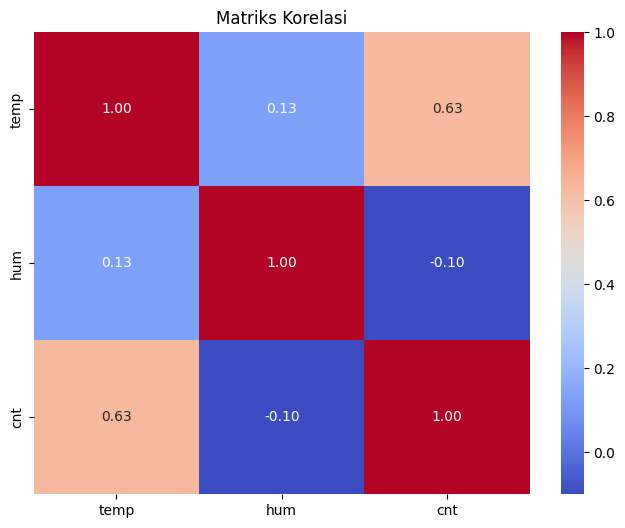

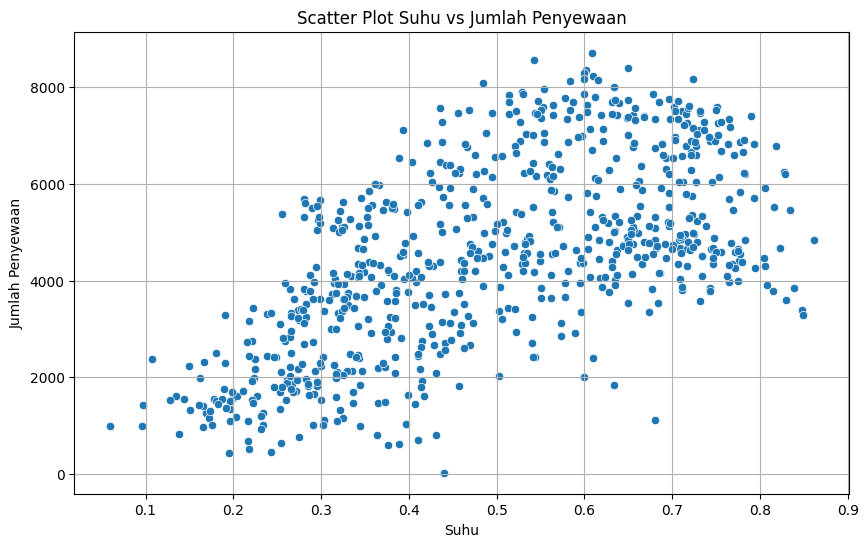

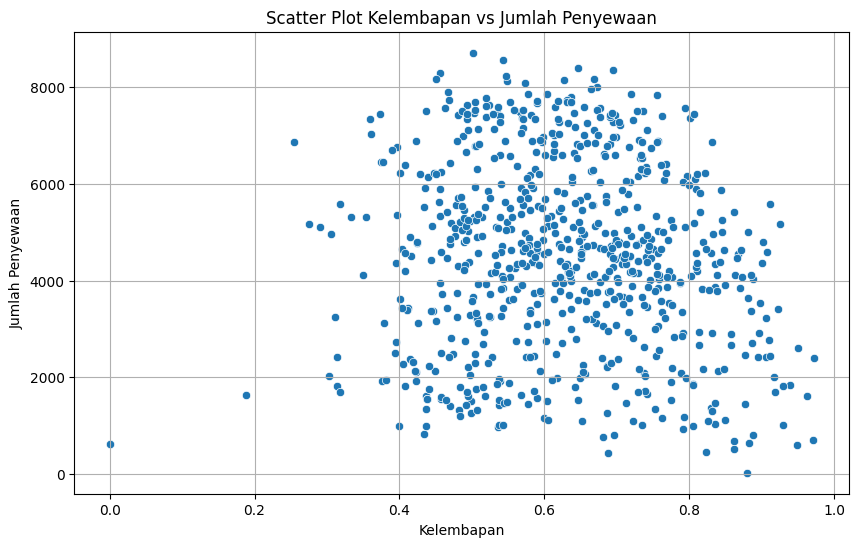

In [ ]:
# Hitung korelasi antara suhu, kelembapan, dan jumlah penyewaan
correlation = bike_day[['temp', 'hum', 'cnt']].corr()
print(correlation)

# Visualisasi heatmap korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi')
plt.show()

# Scatter plot suhu vs jumlah penyewaan
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=bike_day)
plt.title('Scatter Plot Suhu vs Jumlah Penyewaan')
plt.xlabel('Suhu')
plt.ylabel('Jumlah Penyewaan')
plt.grid()
plt.show()

# Scatter plot kelembapan vs jumlah penyewaan
plt.figure(figsize=(10, 6))
sns.scatterplot(x='hum', y='cnt', data=bike_day)
plt.title('Scatter Plot Kelembapan vs Jumlah Penyewaan')
plt.xlabel('Kelembapan')
plt.ylabel('Jumlah Penyewaan')
plt.grid()
plt.show()

          temp       hum       cnt
temp  1.000000 -0.069881  0.404772
hum  -0.069881  1.000000 -0.322911
cnt   0.404772 -0.322911  1.000000


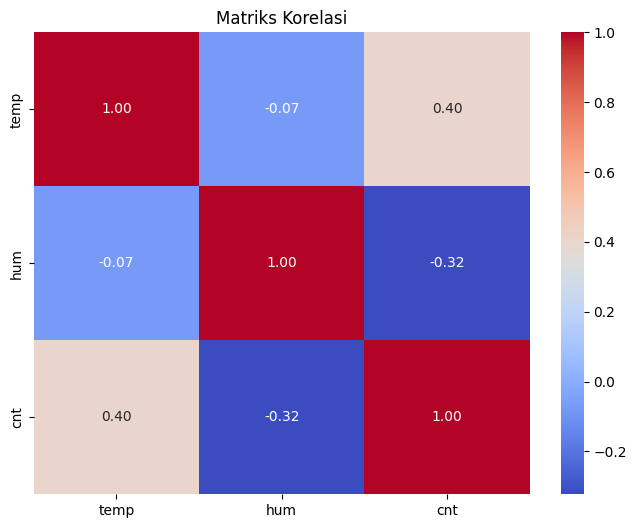

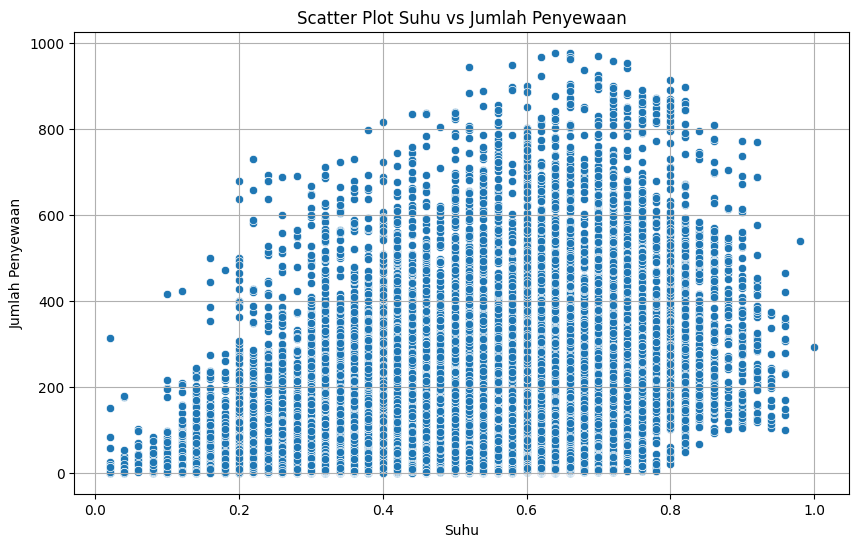

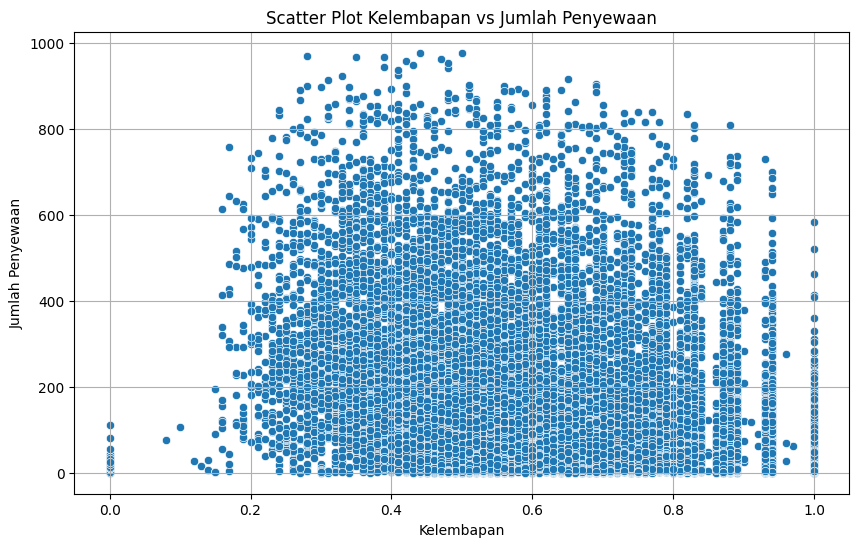

In [ ]:
# Hitung korelasi antara suhu, kelembapan, dan jumlah penyewaan
correlation = bike_hr[['temp', 'hum', 'cnt']].corr()
print(correlation)

# Visualisasi heatmap korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi')
plt.show()

# Scatter plot suhu vs jumlah penyewaan
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=bike_hr)
plt.title('Scatter Plot Suhu vs Jumlah Penyewaan')
plt.xlabel('Suhu')
plt.ylabel('Jumlah Penyewaan')
plt.grid()
plt.show()

# Scatter plot kelembapan vs jumlah penyewaan
plt.figure(figsize=(10, 6))
sns.scatterplot(x='hum', y='cnt', data=bike_hr)
plt.title('Scatter Plot Kelembapan vs Jumlah Penyewaan')
plt.xlabel('Kelembapan')
plt.ylabel('Jumlah Penyewaan')
plt.grid()
plt.show()

### Box Plot untuk Pengaruh Cuaca

Text(0, 0.5, 'Jumlah Penyewaan')

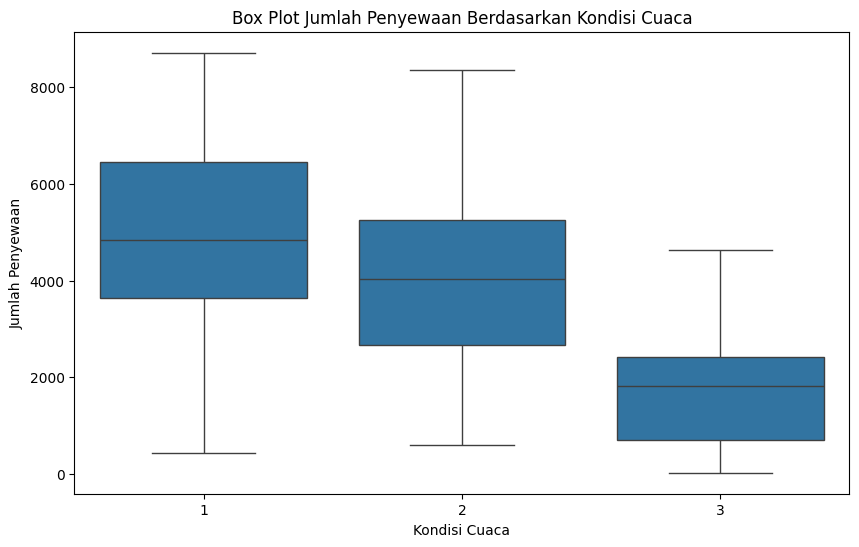

In [ ]:
# Box plot untuk kondisi cuaca
plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit', y='cnt', data=bike_day)
plt.title('Box Plot Jumlah Penyewaan Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Penyewaan')

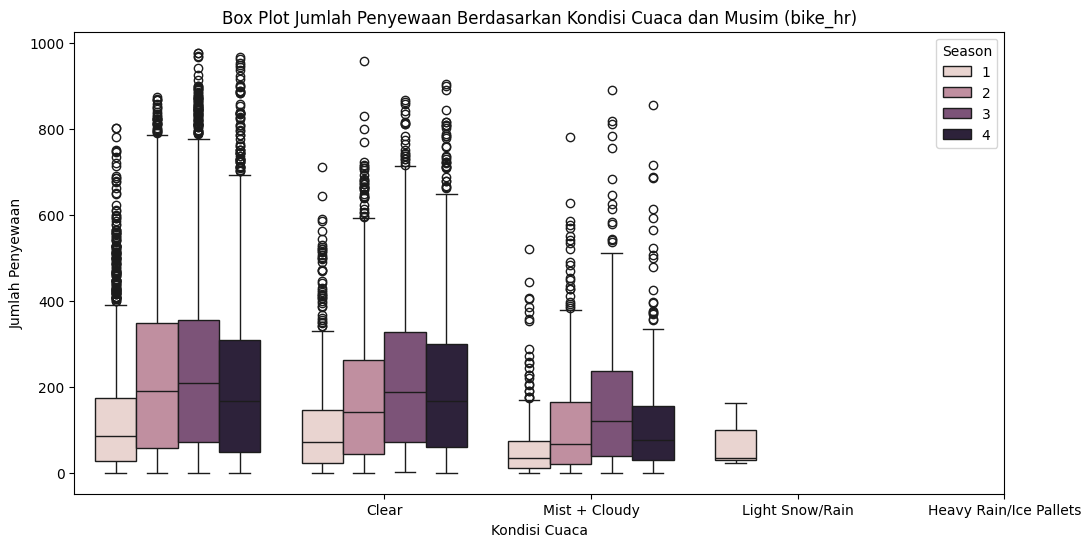

In [ ]:
# Box plot untuk kondisi cuaca with improved labeling and hue (bike_hr)
plt.figure(figsize=(12, 6))
sns.boxplot(x='weathersit', y='cnt', hue='season', data=bike_hr)
plt.title('Box Plot Jumlah Penyewaan Berdasarkan Kondisi Cuaca dan Musim (bike_hr)')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(ticks=[1, 2, 3, 4],
           labels=['Clear', 'Mist + Cloudy', 'Light Snow/Rain', 'Heavy Rain/Ice Pallets'])  # Descriptive labels
plt.legend(title='Season')
plt.show()



Insight

*   Insight dari EDA ini dapat membantu merancang strategi operasional, seperti penambahan armada sepeda pada waktu atau lokasi dengan permintaan tinggi.
*  Analisis membantu mengidentifikasi tren umum dan potensi anomali yang dapat diperiksa lebih lanjut untuk pengelolaan data atau operasional yang lebih baik
*   Penggunaan visualisasi seperti heatmap, scatter plot, dan diagram batang memberikan gambaran yang jelas tentang pola, tren, dan hubungan antarvariabel.
*   Penyewaan sepeda cenderung berbeda antara hari kerja dan akhir pekan, dengan pola jam tertentu yang menunjukkan peningkatan aktivitas.
*   Terdapat hubungan positif antara suhu dengan jumlah penyewaan sepeda; semakin hangat cuacanya, semakin banyak sepeda yang disewa.
*   Kelembapan tinggi cenderung berdampak negatif pada jumlah penyewaan sepeda, menunjukkan bahwa kondisi cuaca memengaruhi keputusan pengguna.
*   Jam dan hari memiliki pengaruh signifikan pada pola penyewaan, terutama terkait rutinitas seperti perjalanan kerja atau aktivitas rekreasi di akhir pekan.










## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola permintaan penyewaan sepeda pada hari kerja dibandingkan akhir pekan, berdasarkan waktu dan musim?

Pola Permintaan Harian:

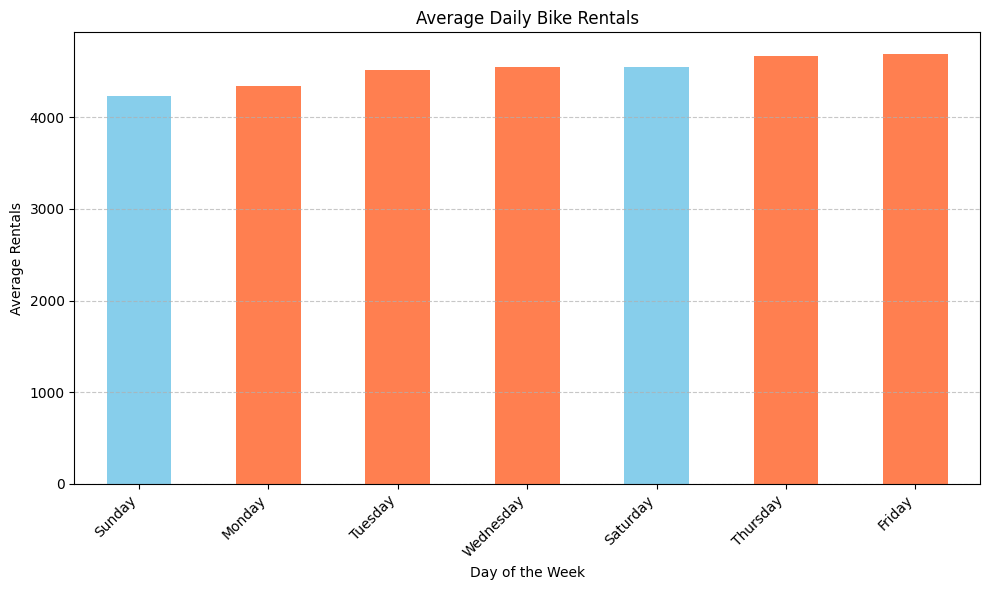

In [ ]:
# Group data by day of the week and calculate average rentals
daily_rentals = bike_day.groupby('day_of_week')['cnt'].mean().sort_values()

# Create a bar plot
plt.figure(figsize=(10, 6))
daily_rentals.plot(kind='bar', color=['skyblue' if day in ['Saturday', 'Sunday'] else 'coral' for day in daily_rentals.index])
plt.title('Average Daily Bike Rentals')
plt.xlabel('Day of the Week')
plt.ylabel('Average Rentals')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a subtle grid for better visualization
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

Grafik ini akan menunjukkan rata-rata penyewaan sepeda untuk setiap hari dalam seminggu. Dari visualisasi ini, kita bisa melihat perbedaan pola permintaan antara hari kerja dan akhir pekan.

Pola Permintaan Berdasarkan Jam:

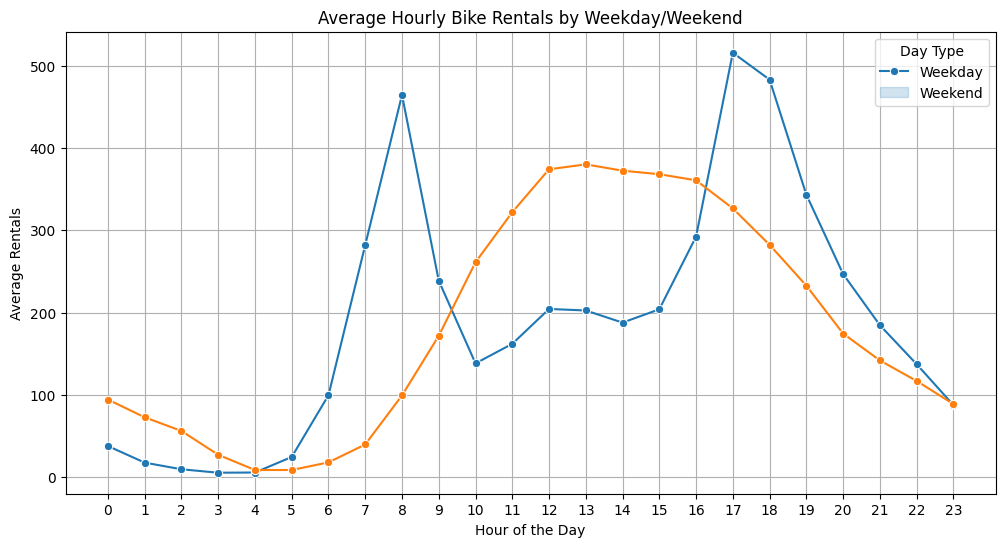

In [ ]:
# Group data by hour and day type (weekday/weekend) and calculate average rentals
hourly_rentals = bike_hr.groupby(['hr', 'is_weekend'])['cnt'].mean().reset_index()

# Create a line plot to visualize hourly rental patterns for weekdays and weekends
plt.figure(figsize=(12, 6))
sns.lineplot(x='hr', y='cnt', hue='is_weekend', data=hourly_rentals, marker='o')
plt.title('Average Hourly Bike Rentals by Weekday/Weekend')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Rentals')
plt.xticks(range(24))  # Set x-axis ticks to represent each hour of the day
plt.grid(True)
plt.legend(title='Day Type', labels=['Weekday', 'Weekend'])
plt.show()

Grafik ini akan menunjukkan pola permintaan berdasarkan jam untuk hari kerja dan akhir pekan. Kita bisa mengidentifikasi jam-jam sibuk pada kedua tipe hari tersebut.

Pola Permintaan Berdasarkan Musim:

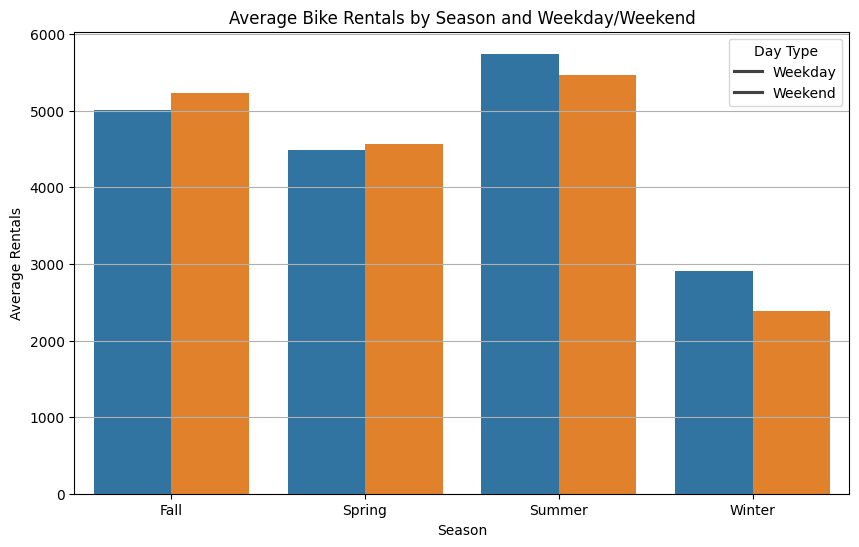

In [ ]:
# Group data by season and day type (weekday/weekend) and calculate average rentals
seasonal_rentals = bike_day.groupby(['season', 'is_weekend'])['cnt'].mean().reset_index()

# Create a bar plot to visualize seasonal rental patterns for weekdays and weekends
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='cnt', hue='is_weekend', data=seasonal_rentals)
plt.title('Average Bike Rentals by Season and Weekday/Weekend')
plt.xlabel('Season')
plt.ylabel('Average Rentals')
plt.grid(axis='y')
plt.legend(title='Day Type', labels=['Weekday', 'Weekend'])
plt.show()

Visualisasi ini akan menunjukkan perbedaan pola permintaan antar musim untuk hari kerja dan akhir pekan.

Insight :


*   **Perbedaan Permintaan antara Hari Kerja dan Akhir Pekan:** Berdasarkan grafik Average Daily Bike Rentals, terlihat bahwa rata-rata penyewaan sepeda pada hari kerja (Senin-Jumat) lebih tinggi dibandingkan dengan akhir pekan (Sabtu-Minggu). Hal ini mengindikasikan bahwa sepeda lebih banyak digunakan untuk aktivitas komuter pada hari kerja.
*   **Pola Permintaan Berdasarkan Jam:** Dari grafik Average Hourly Bike Rentals by Weekday/Weekend, terlihat bahwa pada hari kerja terdapat dua puncak permintaan, yaitu pada pukul 7-9 pagi dan 16-18 sore. Puncak ini menunjukkan penggunaan sepeda untuk perjalanan ke dan dari tempat kerja atau sekolah. Pada akhir pekan, puncak permintaan terjadi di siang hari (pukul 10-16), yang kemungkinan besar disebabkan oleh aktivitas rekreasi.
*   **Pengaruh Musim:** Grafik Average Bike Rentals by Season and Weekday/Weekend menunjukkan bahwa permintaan penyewaan sepeda lebih tinggi pada musim gugur dan musim panas, baik pada hari kerja maupun akhir pekan. Permintaan terendah terjadi pada musim dingin, yang mungkin disebabkan oleh kondisi cuaca yang kurang mendukung.
*   **Perbedaan Pola Antar Musim dan Hari:** Terlihat perbedaan pola permintaan antara hari kerja dan akhir pekan di setiap musim. Pada musim gugur dan musim panas, perbedaan permintaan antara hari kerja dan akhir pekan tidak terlalu signifikan. Namun, pada musim dingin dan musim semi, perbedaan permintaan antara hari kerja dan akhir pekan lebih terlihat, dengan permintaan pada hari kerja masih lebih tinggi.


### Pertanyaan 2: Bagaimana pengaruh faktor cuaca (suhu, kelembapan, dan kondisi cuaca) terhadap jumlah sepeda yang disewa?

Pengaruh Suhu:

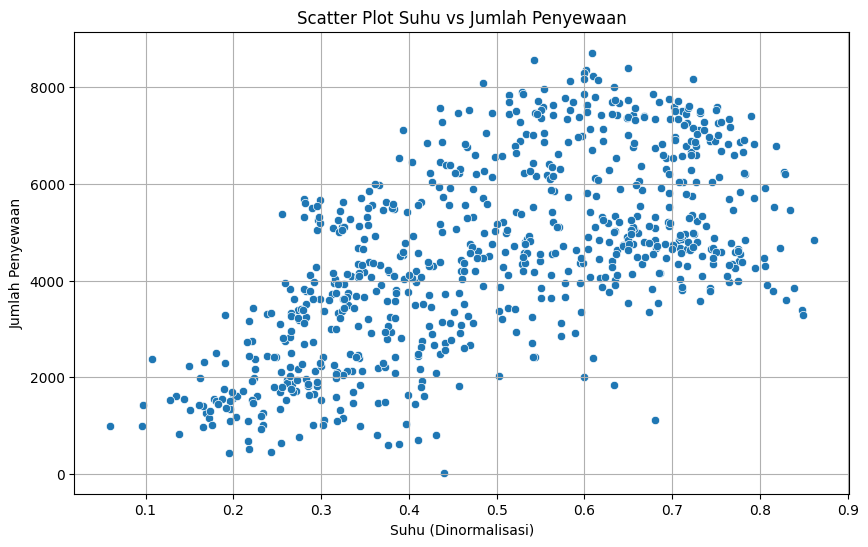

In [ ]:
# Scatter plot suhu vs jumlah penyewaan
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=bike_day)
plt.title('Scatter Plot Suhu vs Jumlah Penyewaan')
plt.xlabel('Suhu (Dinormalisasi)')
plt.ylabel('Jumlah Penyewaan')
plt.grid()
plt.show()

Scatter plot ini menunjukkan hubungan positif antara suhu dan jumlah penyewaan sepeda. Semakin tinggi suhu (dinormalisasi), semakin banyak sepeda yang disewa. Hal ini menunjukkan bahwa orang-orang cenderung lebih memilih untuk bersepeda saat cuaca hangat.

Pengaruh Kelembapan:

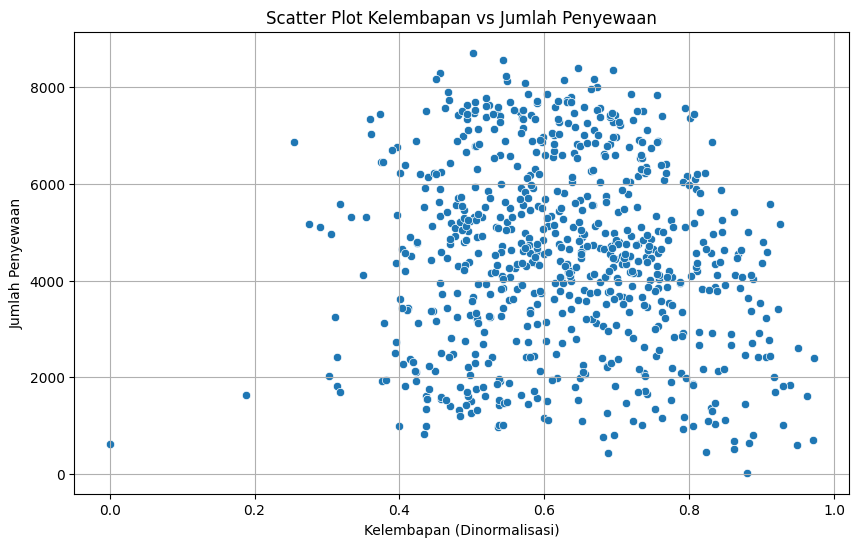

In [ ]:
# Scatter plot kelembapan vs jumlah penyewaan
plt.figure(figsize=(10, 6))
sns.scatterplot(x='hum', y='cnt', data=bike_day)
plt.title('Scatter Plot Kelembapan vs Jumlah Penyewaan')
plt.xlabel('Kelembapan (Dinormalisasi)')
plt.ylabel('Jumlah Penyewaan')
plt.grid()
plt.show()

 Scatter plot ini menunjukkan hubungan yang kurang jelas antara kelembapan dan jumlah penyewaan sepeda. Terlihat sedikit kecenderungan penurunan jumlah penyewaan saat kelembapan tinggi, tetapi tidak sekuat pengaruh suhu.

Pengaruh Kondisi Cuaca:

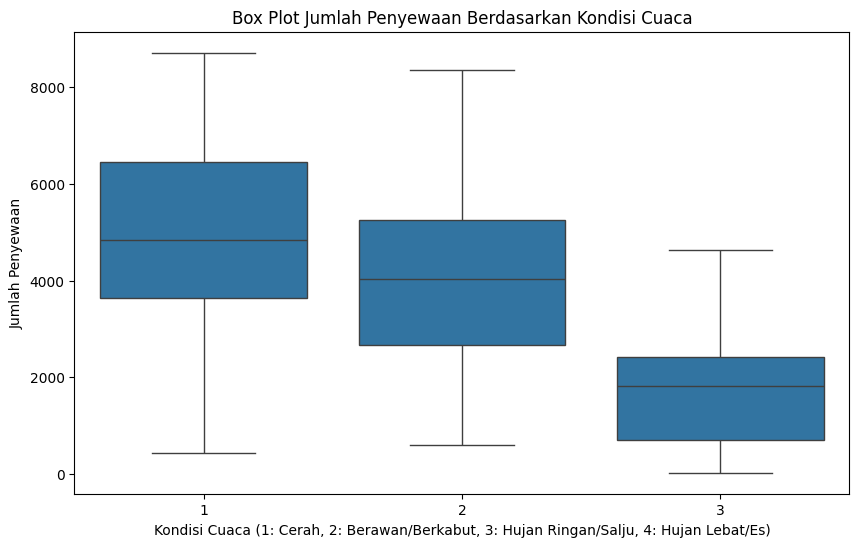

In [ ]:
# Box plot untuk kondisi cuaca
plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit', y='cnt', data=bike_day)
plt.title('Box Plot Jumlah Penyewaan Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca (1: Cerah, 2: Berawan/Berkabut, 3: Hujan Ringan/Salju, 4: Hujan Lebat/Es)')
plt.ylabel('Jumlah Penyewaan')
plt.show()

Box plot ini menunjukkan pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda. Jumlah penyewaan tertinggi terjadi saat cuaca cerah (1), dan menurun secara signifikan saat kondisi cuaca memburuk (2, 3, dan 4). Kondisi cuaca buruk seperti hujan lebat atau badai es (4) memiliki dampak paling negatif pada jumlah penyewaan.

Insight :

*   **Pengaruh Suhu:** Terdapat korelasi positif yang kuat antara suhu dan jumlah penyewaan sepeda. Semakin tinggi suhu, semakin banyak orang yang cenderung menyewa sepeda. Hal ini terlihat jelas pada scatter plot "Suhu vs Jumlah Penyewaan" di mana titik-titik data cenderung membentuk pola menaik dari kiri bawah ke kanan atas.
* **Pengaruh Kelembapan:** Kelembapan memiliki pengaruh yang lebih lemah dan kurang konsisten terhadap jumlah penyewaan dibandingkan dengan suhu. Scatter plot "Kelembapan vs Jumlah Penyewaan" menunjukkan pola yang lebih tersebar dan tidak membentuk tren yang jelas. Meskipun demikian, terlihat sedikit kecenderungan penurunan jumlah penyewaan pada tingkat kelembapan yang sangat tinggi.
*   **Pengaruh Kondisi Cuaca:** Kondisi cuaca memiliki dampak yang signifikan terhadap jumlah penyewaan sepeda. Box plot "Jumlah Penyewaan Berdasarkan Kondisi Cuaca" menunjukkan bahwa cuaca cerah (1) menghasilkan jumlah penyewaan tertinggi, sedangkan cuaca buruk seperti hujan lebat atau badai (4) mengakibatkan penurunan drastis dalam jumlah penyewaan. Cuaca berawan atau berkabut (2) dan hujan ringan/salju (3) memiliki dampak negatif, tetapi tidak separah cuaca buruk yang ekstrem.



## Kesimpulan




*   **Pertanyaan 1:** Pola permintaan penyewaan sepeda dipengaruhi oleh kombinasi hari, waktu, dan musim. Perbedaan pola ini menunjukkan adanya segmentasi pengguna yang berbeda, yaitu pengguna komuter pada hari kerja dan pengguna rekreasi pada akhir pekan. Operator penyewaan sepeda dapat memanfaatkan informasi ini untuk mengoptimalkan strategi operasional mereka, seperti alokasi sepeda, penentuan harga, dan promosi yang ditargetkan.

*   **Pertanyaan 2:** Faktor cuaca, terutama suhu dan kondisi cuaca, merupakan faktor penting yang memengaruhi permintaan penyewaan sepeda. Suhu yang lebih hangat dan kondisi cuaca yang baik mendorong lebih banyak orang untuk bersepeda, sementara cuaca buruk dapat mengurangi jumlah penyewaan secara signifikan. Operator penyewaan sepeda dapat memanfaatkan informasi ini untuk mengantisipasi fluktuasi permintaan dan mengoptimalkan strategi operasional mereka, seperti alokasi sepeda, penentuan harga, dan promosi, berdasarkan prakiraan cuaca.

